# Problema de Valor Inicial
PVI definido por:
$$
\begin{cases}
y' = 3 \cdot sin(\frac{x}{2}) \cdot cos(\frac{x}{2}) - 48 \cdot cos(6x) \cdot sin(6x), \quad x \in [0, 7].\\
y(0) = 4.
\end{cases} \\
$$
<br/><br/>
Solução Exata:
$$
y(x) = 3 \cdot sin^2(\frac{x}{2}) + 4 \cdot cos^2(6x).
$$

## Solução Computacional do Problema
### Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

### Funções auxiliares

In [8]:
# Gerar intervalo [a, b] com pontos com espaçamento h
def generate_interval(a, b, h):
    return np.linspace(a, b, int((b - a) / h) + 1)


# Calcular Erro Absoluto
def local_error(exact, approximate):
    return np.abs(exact - approximate)


# Calcular Erro Relativo
def relative_error(exact, approximate):
    return np.abs((exact - approximate) / exact)


# Gera um dicionário com os resultados formatados
def format_dict(dict):
    new_dict = {}
    for key, value in dict.items():
        arr = []
        for i in value:
            arr.append(str(i).replace(".", ",").replace("[", "").replace("]", ""))
            new_dict[key] = arr
    return new_dict

### Métodos

In [9]:
# A equação diferencial do problema
def dydx(x):
    return 3 * np.sin(x / 2) * np.cos(x / 2) - 48 * np.cos(6 * x) * np.sin(6 * x)


# A solução analítica do problema
def solucao_analitica(x):
    return 3 * np.sin(x / 2) ** 2 + 4 * np.cos(6 * x) ** 2


# Método de Euler
def euler(x0, x1, y0, h):
    x = x0
    y = [y0]
    n = int((x1 - x0) / h)
    for i in range(n):
        y.append(y[i] + h * dydx(x))
        x += h
    return y


# Método de Euler Implícito
def euler_implicito(x0, x1, y0, h):
    x = x0
    y = [y0]
    n = int((x1 - x0) / h)
    for i in range(n):
        y.append(y[i] + h * dydx(x + h))
        x += h
    return y


# Método dos Trapézios
def trapezio(x0, x1, y0, h):
    x = x0
    y = [y0]
    n = int((x1 - x0) / h)
    for i in range(n):
        y.append(y[i] + h / 2 * (dydx(x) + dydx(x + h)))
        x += h
    return y


# Método de Taylor de 2ª ordem
def taylor_2(x0, x1, y0, h):
    x = x0
    y = [y0]
    n = int((x1 - x0) / h)
    for i in range(n):
        y1 = dydx(x)
        y2 = lambda x: 3 * np.cos(x) / 2 - 288 * np.cos(12 * x)
        y.append(y[i] + h * y1 + h**2 / 2 * y2(x))
        x += h
    return y


# Método de Euler Melhorado
def euler_melhorado(x0, x1, y0, h):
    x = x0
    y = [y0]
    n = int((x1 - x0) / h)
    for i in range(n):
        y.append(y[i] + h * dydx(x))
        y[i + 1] = y[i] + h / 2 * (dydx(x) + dydx(x + h))
        x += h
    return y


# Método de Euler Modificado
def euler_modificado(x0, x1, y0, h):
    x = x0
    y = [y0]
    n = int((x1 - x0) / h)
    for i in range(n):
        y.append(y[i] + h * dydx(x))
        y[i + 1] = y[i] + h * dydx(x + h / 2)
        x += h
    return y


# Método de Runge-Kutta de 3ª ordem
def runge_kutta_3(x0, x1, y0, h):
    x = x0
    y = [y0]
    n = int((x1 - x0) / h)
    for i in range(n):
        k1 = dydx(x)
        k2 = dydx(x + h / 2)
        k3 = dydx(x + 3 * h / 4)
        y.append(y[i] + h / 9 * (2 * k1 + 3 * k2 + 4 * k3))
        x += h
    return y


# Método de Runge-Kutta de 4ª ordem
def runge_kutta4(x0, x1, y0, h):
    x = x0
    y = [y0]
    n = int((x1 - x0) / h)
    for i in range(n):
        k1 = dydx(x)
        k2 = dydx(x + h / 2)
        k3 = dydx(x + h / 2)
        k4 = dydx(x + h)
        y.append(y[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))
        x += h
    return y


# Método previsor-corretor
def previsor_corretor(x0, x1, y0, h, tolerancia=1e-6, max_iter=100):
    x = x0
    y = [y0]
    n = int((x1 - x0) / h)
    for i in range(n):
        # Previsor
        y_pred = y[i] + h * dydx(x)
        # Corretor
        y_corr = y[i] + h / 2 * (dydx(x) + dydx(x + h))
        # Iterações
        iter = 0
        while np.abs(y_corr - y_pred) > tolerancia and iter < max_iter:
            y_pred = y_corr
            y_corr = y[i] + h / 2 * (dydx(x) + dydx(x + h))
            iter += 1
        y.append(y_pred)
        x += h
    return y

### Gerar gráficos

In [10]:
# Gerar os gráficos de cada método
def gerar_graficos(
    x,
    x0,
    x1,
    y0,
    h,
    xlim=None,
    ylim=None,
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=None,
    dpi=None,
):
    # Parâmetros para o gráfico
    if xlim != None:
        plt.xlim(xlim)
    if ylim != None:
        plt.ylim(ylim)
    if title != None:
        plt.title(title)
    if xlabel != None:
        plt.xlabel(xlabel)
    if ylabel != None:
        plt.ylabel(ylabel)
    plt.rc(
        "axes",
        prop_cycle=(
            plt.cycler(
                "color",
                [
                    "r",
                    "orange",
                    "y",
                    "lime",
                    "turquoise",
                    "royalblue",
                    "darkviolet",
                    "fuchsia",
                    "hotpink",
                ],
            )
        ),
    )

    # Calcula a solução analítica e as soluções aproximadas pelos métodos
    y_analitico = solucao_analitica(x)
    y_euler = euler(x0, x1, y0, h)
    y_euler_implicito = euler_implicito(x0, x1, y0, h)
    y_trapezio = trapezio(x0, x1, y0, h)
    y_taylor_2 = taylor_2(x0, x1, y0, h)
    y_euler_modificado = euler_modificado(x0, x1, y0, h)
    y_euler_melhorado = euler_melhorado(x0, x1, y0, h)
    y_runge_kutta_3 = runge_kutta_3(x0, x1, y0, h)
    y_runge_kutta_4 = runge_kutta4(x0, x1, y0, h)
    y_previsor_corretor = previsor_corretor(x0, x1, y0, h)

    # Calcula os erros para cada método
    erro_euler = local_error(y_analitico, y_euler)
    erro_euler_implicito = local_error(y_analitico, y_euler_implicito)
    erro_trapezio = local_error(y_analitico, y_trapezio)
    erro_taylor_2 = local_error(y_analitico, y_taylor_2)
    erro_euler_modificado = local_error(y_analitico, y_euler_modificado)
    erro_euler_melhorado = local_error(y_analitico, y_euler_melhorado)
    erro_runge_kutta_3 = local_error(y_analitico, y_runge_kutta_3)
    erro_runge_kutta_4 = local_error(y_analitico, y_runge_kutta_4)
    erro_previsor_corretor = local_error(y_analitico, y_previsor_corretor)

    # Define dicionários coms os resultados
    results = {
        "x": x,
        "y_analitico": y_analitico,
        "y_euler": y_euler,
        "y_euler_implicito": y_euler_implicito,
        "y_trapezio": y_trapezio,
        "y_taylor_2": y_taylor_2,
        "y_euler_modificado": y_euler_modificado,
        "y_euler_melhorado": y_euler_melhorado,
        "y_runge_kutta_3": y_runge_kutta_3,
        "y_runge_kutta_4": y_runge_kutta_4,
        "y_previsor_corretor": y_previsor_corretor,
    }

    errors = {
        "x": x,
        "erro_euler": erro_euler,
        "erro_euler_implicito": erro_euler_implicito,
        "erro_trapezio": erro_trapezio,
        "erro_taylor_2": erro_taylor_2,
        "erro_euler_modificado": erro_euler_modificado,
        "erro_euler_melhorado": erro_euler_melhorado,
        "erro_runge_kutta_3": erro_runge_kutta_3,
        "erro_runge_kutta_4": erro_runge_kutta_4,
        "erro_previsor_corretor": erro_previsor_corretor,
    }

    # Plota um gráfico com os resultados
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.plot(x, y_euler, linewidth=0.8, label="Euler Explícito")
    plt.plot(x, y_euler_implicito, linewidth=0.8, label="Euler Implícito")
    plt.plot(x, y_trapezio, linewidth=0.8, label="Trapézio")
    plt.plot(x, y_taylor_2, linewidth=0.8, label="Taylor de 2ª ordem")
    plt.plot(x, y_euler_modificado, linewidth=0.8, label="Euler Modificado")
    plt.plot(x, y_euler_melhorado, linewidth=0.8, label="Euler Melhorado")
    plt.plot(x, y_runge_kutta_3, linewidth=0.8, label="Runge-Kutta de 3ª ordem")
    plt.plot(x, y_runge_kutta_4, linewidth=0.8, label="Runge-Kutta de 4ª ordem")
    plt.plot(x, y_previsor_corretor, linewidth=0.8, label="Previsor-Corretor")
    plt.plot(
        x,
        y_analitico,
        "black",
        linestyle="dashed",
        linewidth=0.8,
        label="Solução Analítica",
    )
    plt.legend(bbox_to_anchor=(1, 1.02), loc="upper left")

    # Mostra o gráfico
    plt.show()

    # Outros parâmetros para o gráfico
    if figsize != None:
        plt.figure(figsize=figsize)
    if dpi != None:
        plt.figure(dpi=dpi)

    fig = plt.figure()

    # Gera subplots para cada método
    fig_sub, axs = plt.subplots(2, 5)
    fig_sub.suptitle(title)
    fig_sub.set_size_inches(20, 10)
    axs[0, 0].plot(x, y_euler)
    axs[0, 0].set_title("Euler Explícito")
    axs[0, 1].plot(x, y_euler_implicito)
    axs[0, 1].set_title("Euler Implícito")
    axs[0, 2].plot(x, y_trapezio)
    axs[0, 2].set_title("Trapézio")
    axs[0, 3].plot(x, y_taylor_2)
    axs[0, 3].set_title("Taylor de 2ª ordem")
    axs[0, 4].plot(x, y_euler_modificado)
    axs[0, 4].set_title("Euler Modificado")
    axs[1, 0].plot(x, y_euler_melhorado)
    axs[1, 0].set_title("Euler Melhorado")
    axs[1, 1].plot(x, y_runge_kutta_3)
    axs[1, 1].set_title("Runge-Kutta de 3ª ordem")
    axs[1, 2].plot(x, y_runge_kutta_4)
    axs[1, 2].set_title("Runge-Kutta de 4ª ordem")
    axs[1, 3].plot(x, y_previsor_corretor)
    axs[1, 3].set_title("Previsor-Corretor")
    axs[1, 4].plot(x, y_analitico, "black")
    axs[1, 4].set_title("Solução Analítica")
    for ax in axs.flat:
        ax.set(xlabel=xlabel, ylabel=ylabel)
    for ax in axs.flat:
        ax.label_outer()

    # Exibe o gráfico
    plt.show()

    # Gera o gráfico dos erros
    plt.title("Erros " + title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.plot(x, erro_euler, linewidth=0.8, label="Euler Explícito")
    plt.plot(x, erro_euler_implicito, linewidth=0.8, label="Euler Implícito")
    plt.plot(x, erro_trapezio, linewidth=0.8, label="Trapézio")
    plt.plot(x, erro_taylor_2, linewidth=0.8, label="Taylor de 2ª ordem")
    plt.plot(x, erro_euler_modificado, linewidth=0.8, label="Euler Modificado")
    plt.plot(x, erro_euler_melhorado, linewidth=0.8, label="Euler Melhorado")
    plt.plot(x, erro_runge_kutta_3, linewidth=0.8, label="Runge-Kutta de 3ª ordem")
    plt.plot(x, erro_runge_kutta_4, linewidth=0.8, label="Runge-Kutta de 4ª ordem")
    plt.plot(x, erro_previsor_corretor, linewidth=0.8, label="Previsor-Corretor")
    plt.legend(bbox_to_anchor=(1, 1.02), loc="upper left")
    plt.yscale("log")

    # Exibe o gráfico
    plt.show()

    # Retorna o gráfico, os resultados e os erros
    return fig, results, errors

### Gerar gráficos interativos

In [11]:
def gerar_grafico_interativo(x, x0, x1, h, results):
    label = {
        "x": "x",
        "y_analitico": "Solução Analítica",
        "y_euler": "Euler Explícito",
        "y_euler_implicito": "Euler Implícito",
        "y_trapezio": "Trapézio",
        "y_taylor_2": "Taylor de 2ª ordem",
        "y_euler_modificado": "Euler Modificado",
        "y_euler_melhorado": "Euler Melhorado",
        "y_runge_kutta_3": "Runge-Kutta de 3ª ordem",
        "y_runge_kutta_4": "Runge-Kutta de 4ª ordem",
        "y_previsor_corretor": "Previsor-Corretor",
    }
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=x, y=results["y_euler"], mode="lines", name="Euler Explícito")
    )
    fig.add_trace(
        go.Scatter(
            x=x, y=results["y_euler_implicito"], mode="lines", name="Euler Implícito"
        )
    )
    fig.add_trace(
        go.Scatter(x=x, y=results["y_trapezio"], mode="lines", name="Trapézio")
    )
    fig.add_trace(
        go.Scatter(
            x=x, y=results["y_taylor_2"], mode="lines", name="Taylor de 2ª ordem"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=x, y=results["y_euler_modificado"], mode="lines", name="Euler Modificado"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=x, y=results["y_euler_melhorado"], mode="lines", name="Euler Melhorado"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=x,
            y=results["y_runge_kutta_3"],
            mode="lines",
            name="Runge-Kutta de 3ª ordem",
        )
    )
    fig.add_trace(
        go.Scatter(
            x=x,
            y=results["y_runge_kutta_4"],
            mode="lines",
            name="Runge-Kutta de 4ª ordem",
        )
    )
    fig.add_trace(
        go.Scatter(
            x=x,
            y=results["y_previsor_corretor"],
            mode="lines",
            name="Previsor-Corretor",
        )
    )
    fig.add_trace(
        go.Scatter(
            x=x, y=results["y_analitico"], mode="lines", name="Solução Analítica"
        )
    )
    fig.update_layout(title="PVI com h = " + str(h), xaxis_title="x", yaxis_title="y")
    fig.show()

### Resultados

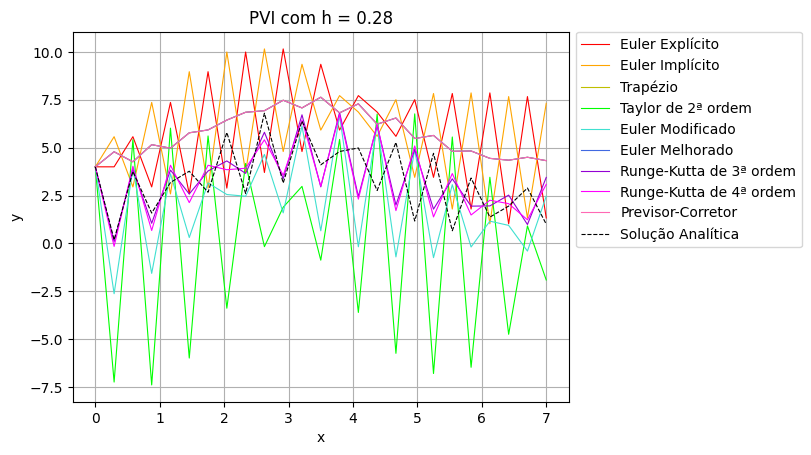

<Figure size 640x480 with 0 Axes>

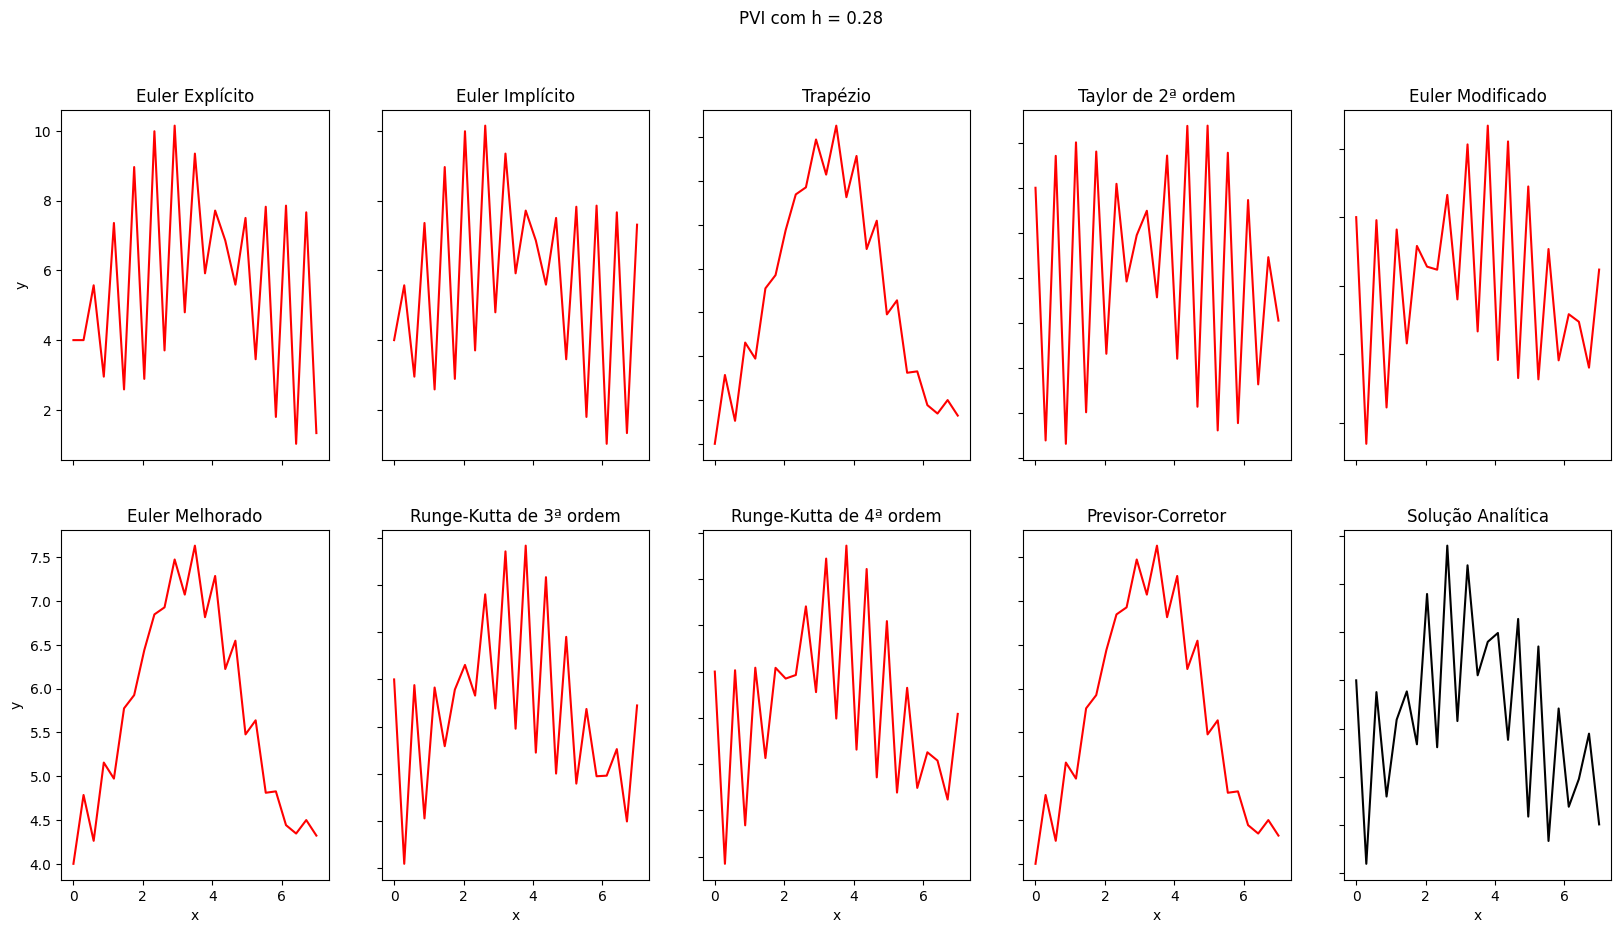

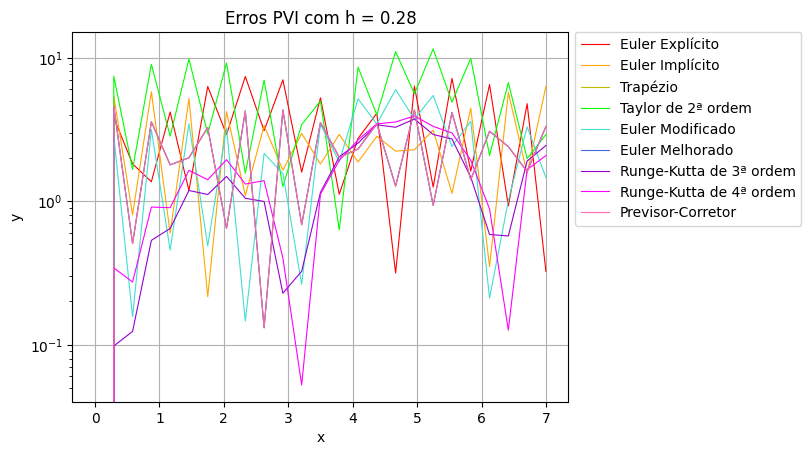

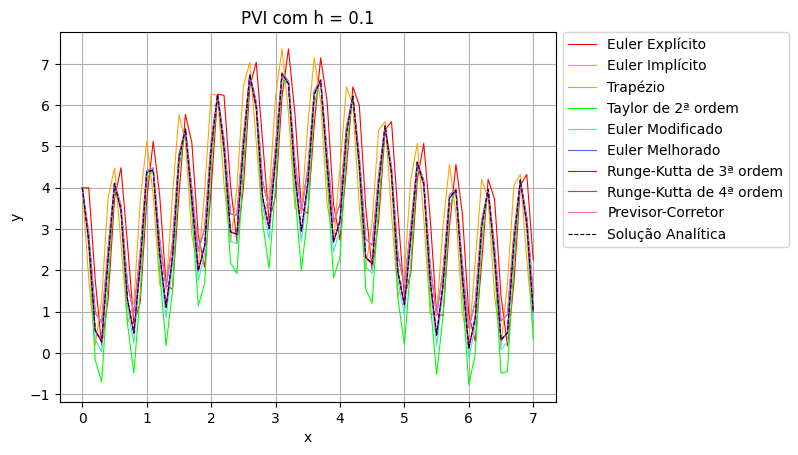

<Figure size 640x480 with 0 Axes>

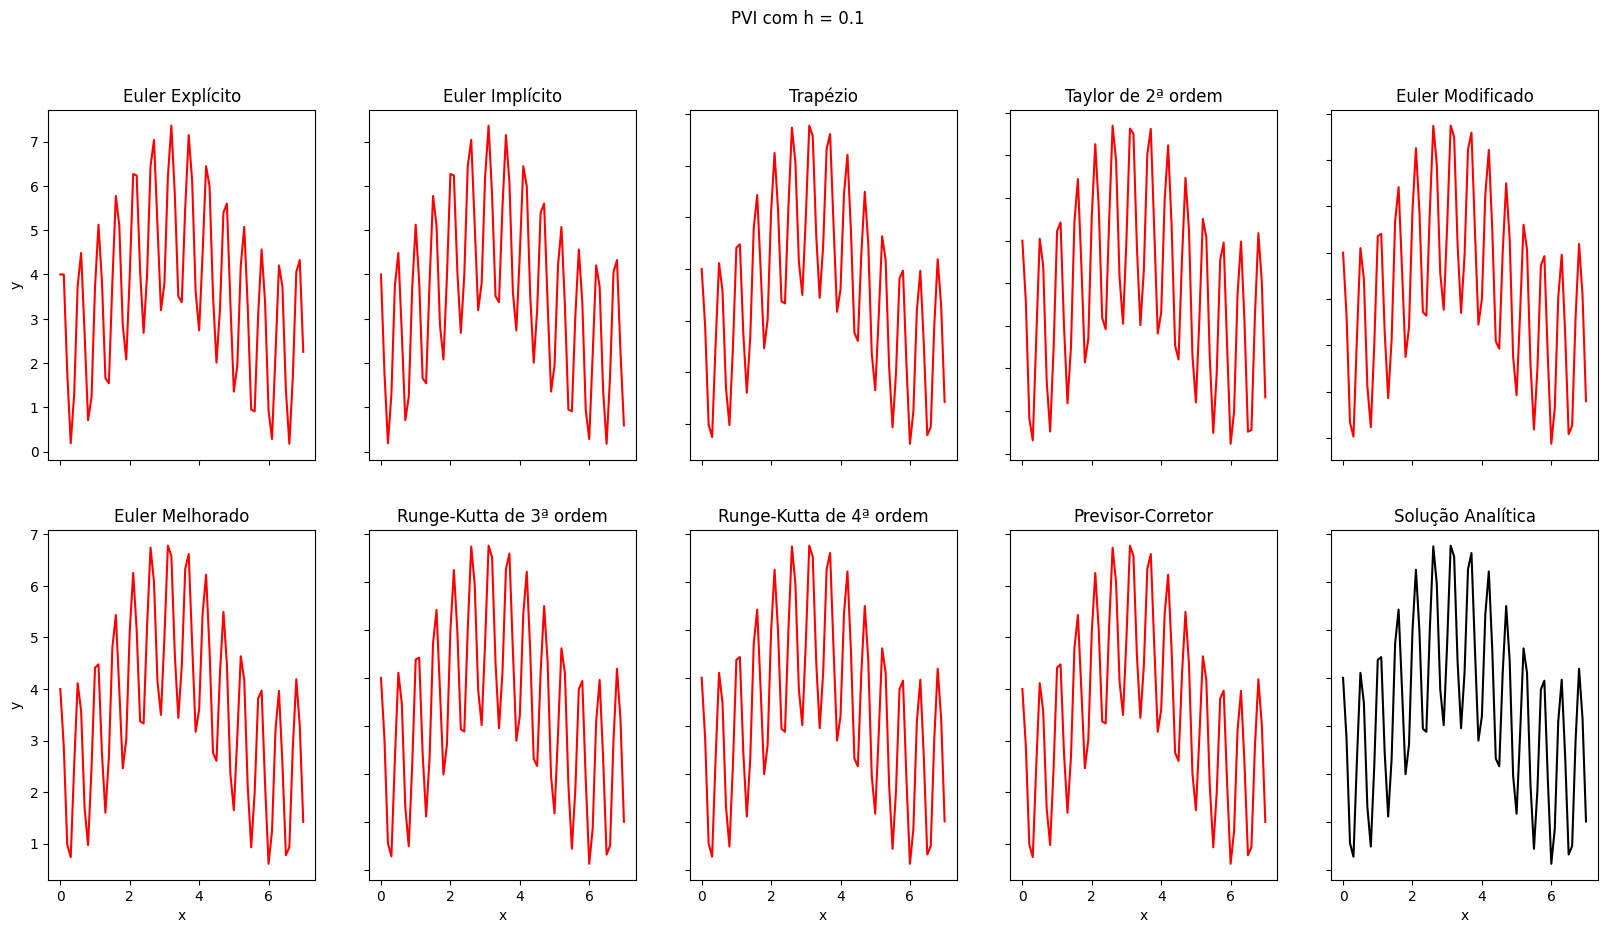

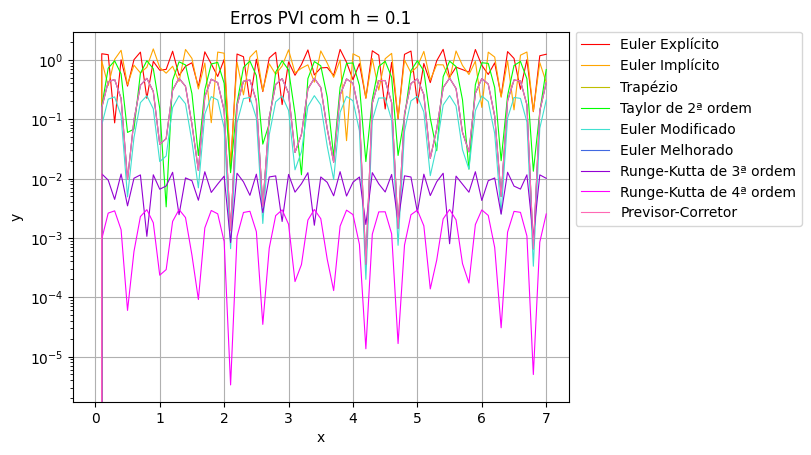

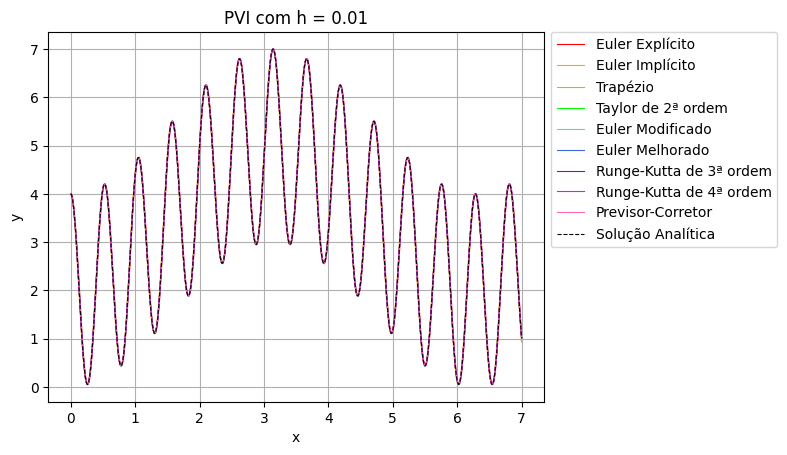

<Figure size 640x480 with 0 Axes>

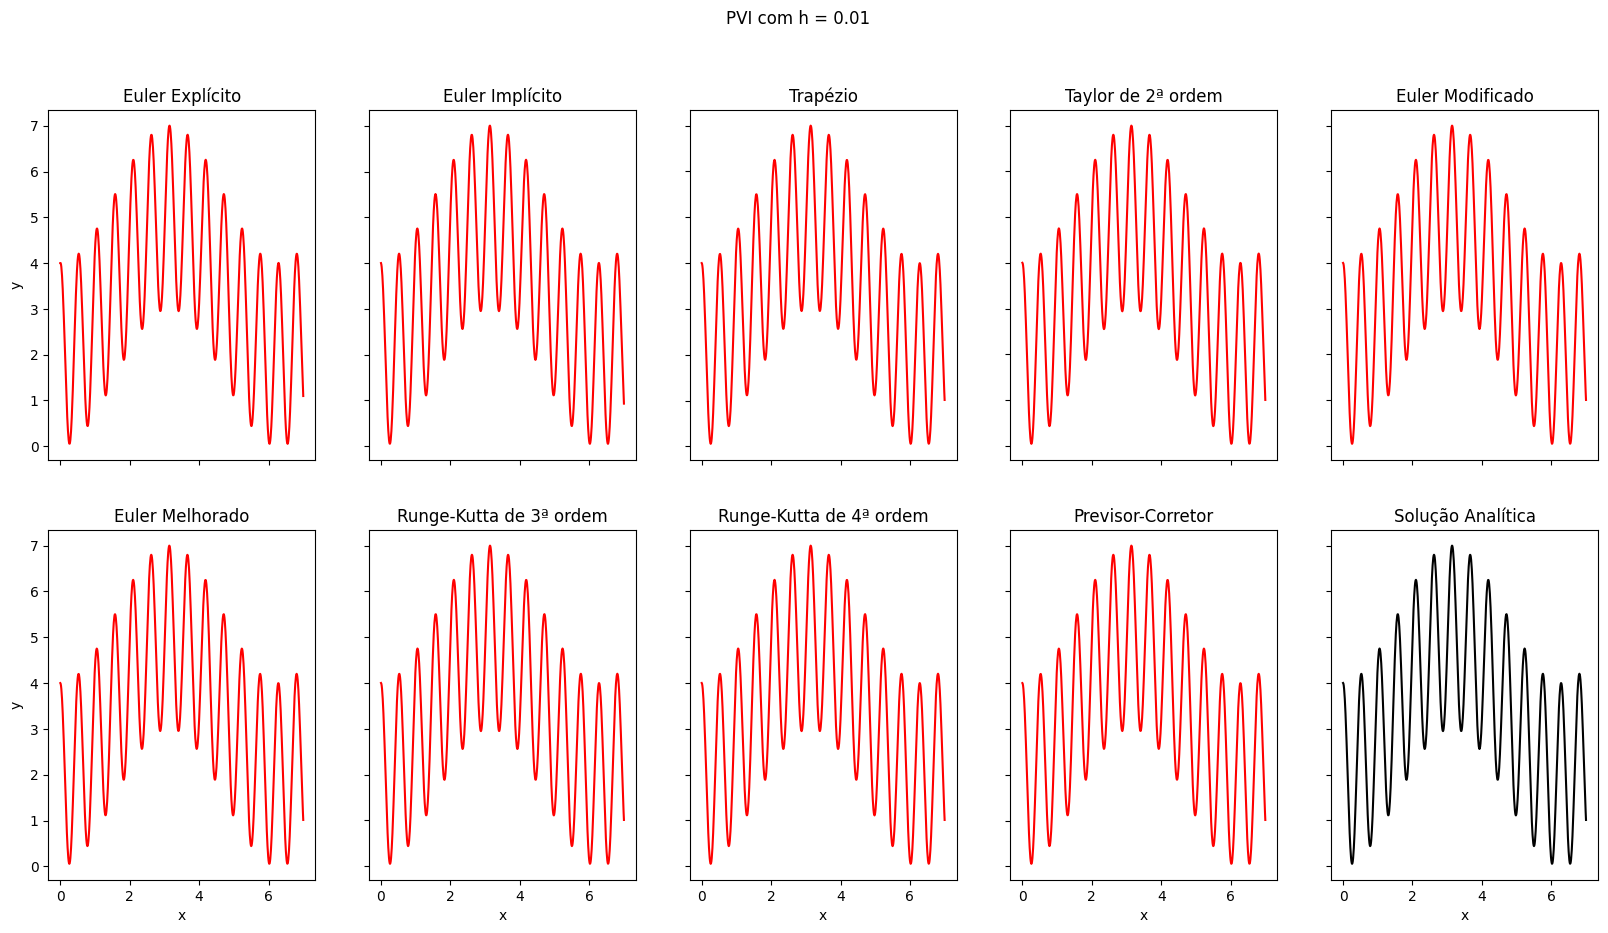

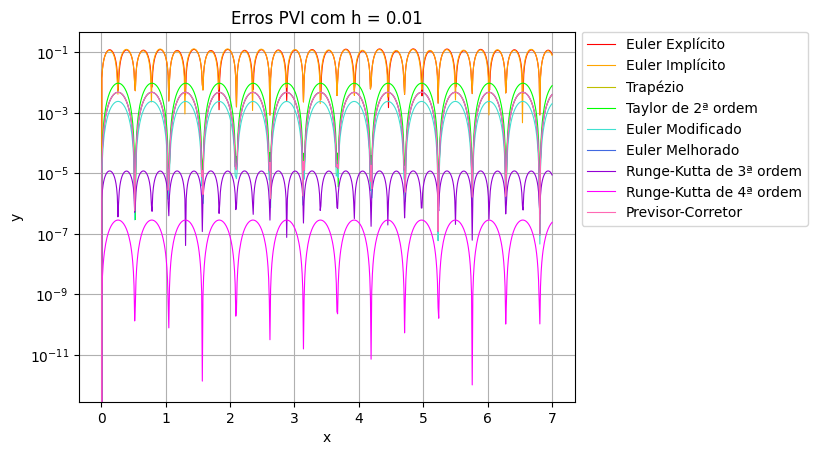

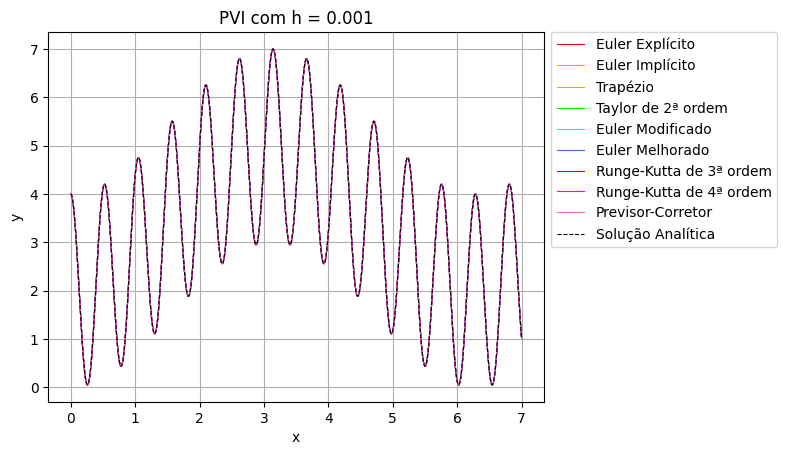

<Figure size 640x480 with 0 Axes>

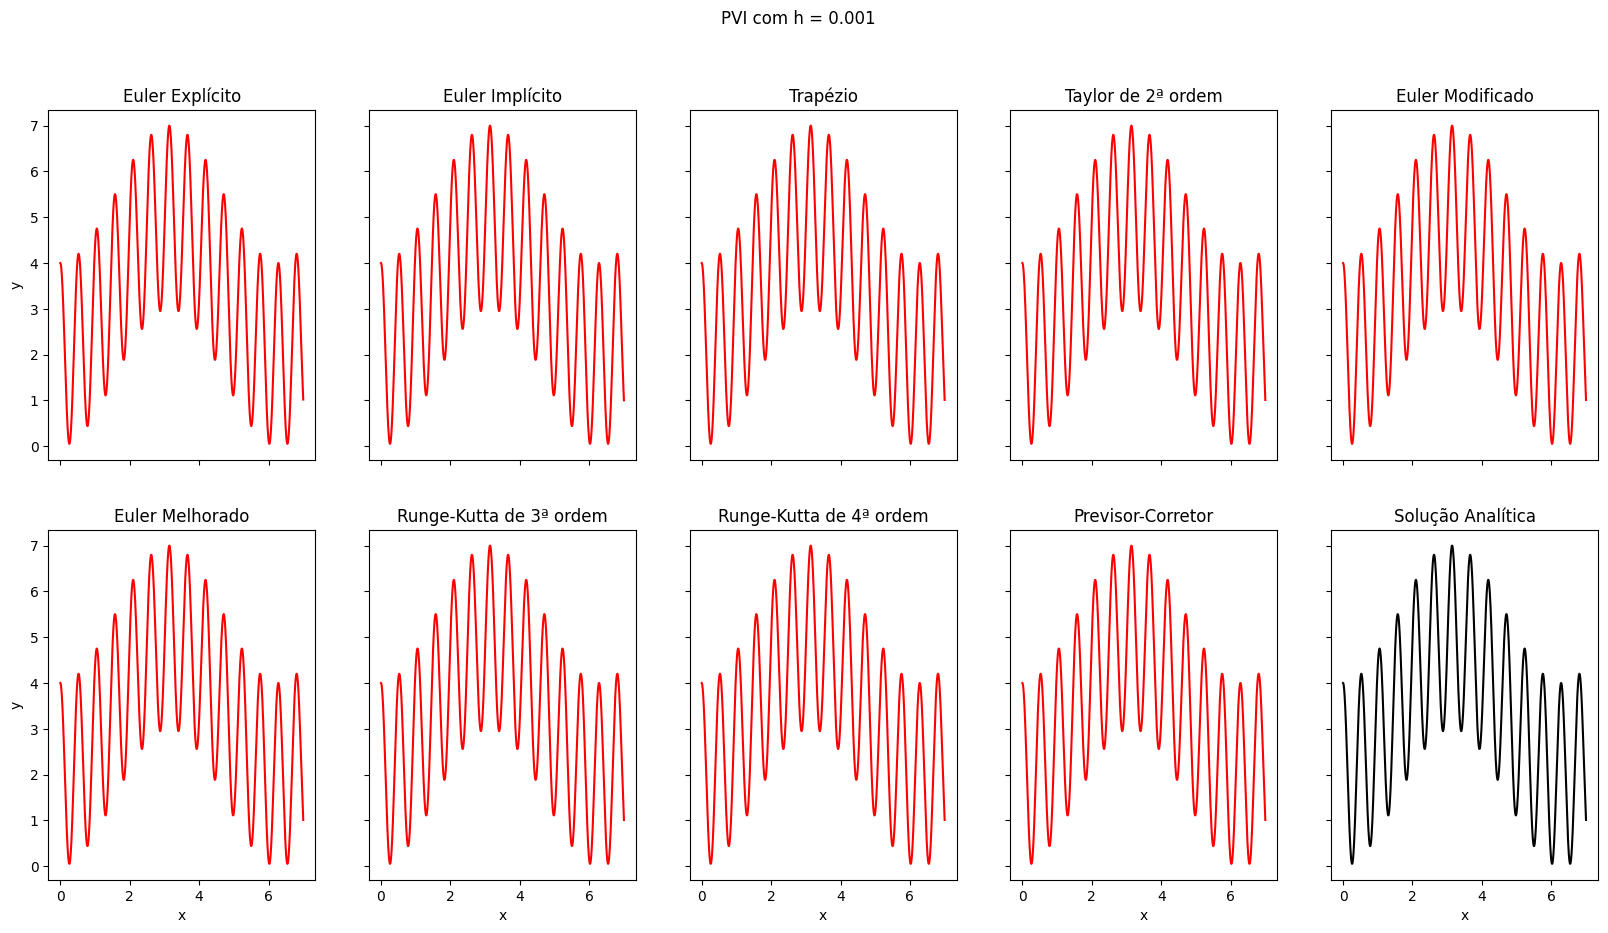

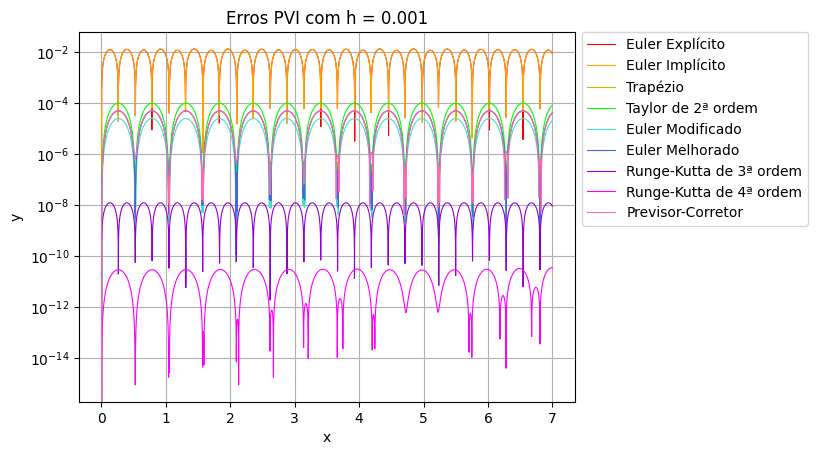

In [12]:
hs = [(7 / 25), 0.1, 0.01, 0.001]
x0 = 0
x1 = 7

y0 = 4

for h in hs:
    x = generate_interval(x0, x1, h)
    fig, results, errors = gerar_graficos(
        x, x0, x1, y0, h, title="PVI com h = " + str(h), xlabel="x", ylabel="y"
    )
    gerar_grafico_interativo(x, x0, x1, h, results)